# NextLabs Solution_3

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define file paths for the uploaded files
file_2019 = 'C:/Users/VISHRUT RELA/Downloads/Bangalore Schools 2019.xlsx'
file_2020 = 'C:/Users/VISHRUT RELA/Downloads/Bangalore Schools 2020.xlsx'
file_2021 = 'C:/Users/VISHRUT RELA/Downloads/Bangalore Schools 2021.xlsx'

# Function to load data from an Excel file with multiple sheets
def load_data(file_path, year):
    data = pd.ExcelFile(file_path)
    combined_data = []
    for sheet_name in data.sheet_names:
        sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)
        sheet_data['School'] = sheet_name
        sheet_data['Year'] = year
        combined_data.append(sheet_data)
    return pd.concat(combined_data, ignore_index=True)

# Load data for all three years
data_2019 = load_data(file_2019, 2019)
data_2020 = load_data(file_2020, 2020)
data_2021 = load_data(file_2021, 2021)

# Combine the datasets into a single DataFrame
data = pd.concat([data_2019, data_2020, data_2021], ignore_index=True)

# Standardize column names
data.columns = data.columns.str.strip().str.lower()
data.rename(columns={
    'student roll': 'student_roll',
    'student name': 'student_name',
    'computer science': 'computer_science',
    'physical education': 'physical_education'
}, inplace=True)

# Calculate total marks for each student
data['total_marks'] = data[[
    'hindi', 'english', 'mathematics', 'physics', 'chemistry', 'biology',
    'history', 'geography', 'civics', 'computer_science', 'physical_education'
]].sum(axis=1)

data.head()

,student_roll,student_name,hindi,english,mathematics,physics,chemistry,biology,history,geography,civics,computer_science,physical_education,school,year,total_marks
0,1001,Akash Ahuja,30,95,78,92,84,36,47,82,44,14,74,Vidya Mandir,2019,676
1,1002,Mohit Srivatsav,32,46,65,53,28,77,36,76,74,77,27,Vidya Mandir,2019,591
2,1003,Anshika Mehra,87,91,74,81,88,100,45,37,10,44,11,Vidya Mandir,2019,668
3,1004,Visakha Tamboli,65,83,83,78,45,61,16,89,52,23,50,Vidya Mandir,2019,645
4,1005,Raju Deshmukh,84,66,98,62,68,99,70,61,65,75,87,Vidya Mandir,2019,835


#  1.Top Performer of Each School


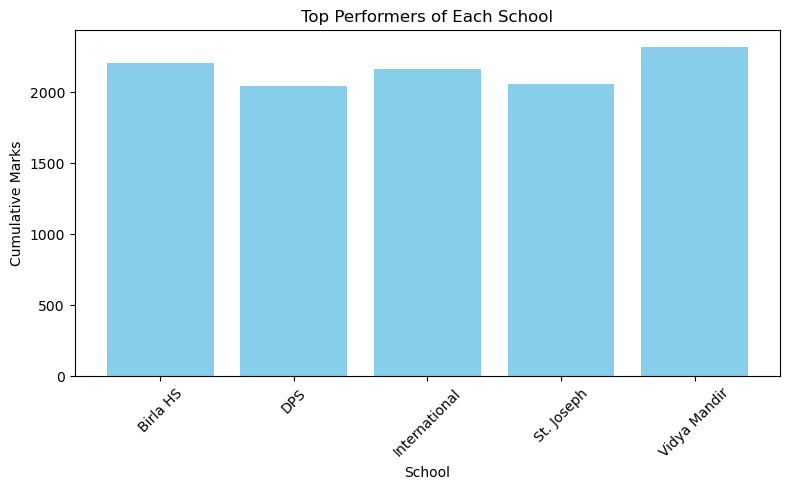

In [28]:
cumulative_marks = data.groupby(['school', 'student_name'])['total_marks'].sum().reset_index()
top_performers = cumulative_marks.loc[cumulative_marks.groupby('school')['total_marks'].idxmax()]

# print the result
top_performers

# Plot Top Performers
plt.figure(figsize=(8, 5))
plt.bar(top_performers['school'], top_performers['total_marks'], color='skyblue')
plt.title('Top Performers of Each School')
plt.xlabel('School')
plt.ylabel('Cumulative Marks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  2.Rank Students by Total Marks (2020)

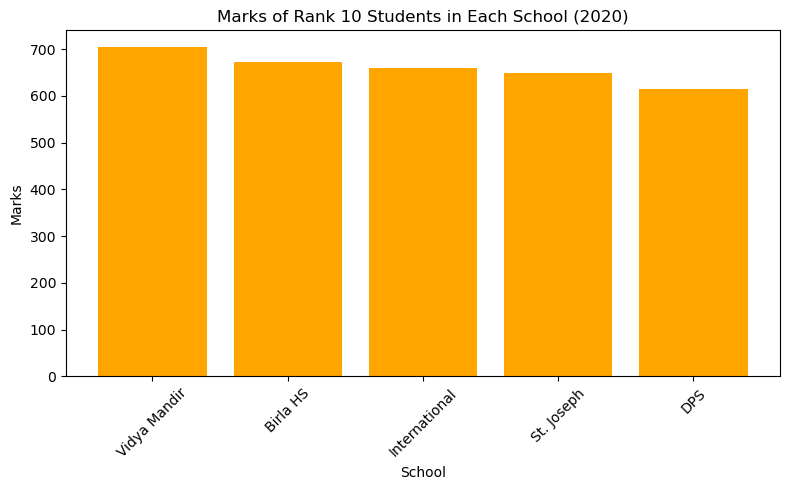

In [27]:
data_2020 = data[data['year'] == 2020].copy()
data_2020['rank'] = data_2020.groupby('school')['total_marks'].rank(ascending=False, method='first')
rank_10_marks = data_2020[data_2020['rank'] == 10].sort_values(by='total_marks', ascending=False)

# print the result
rank_10_marks

# Plot Rank 10 Marks
plt.figure(figsize=(8,5))
plt.bar(rank_10_marks['school'], rank_10_marks['total_marks'], color='orange')
plt.title('Marks of Rank 10 Students in Each School (2020)')
plt.xlabel('School')
plt.ylabel('Marks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.Highest Improvement for Each Subject

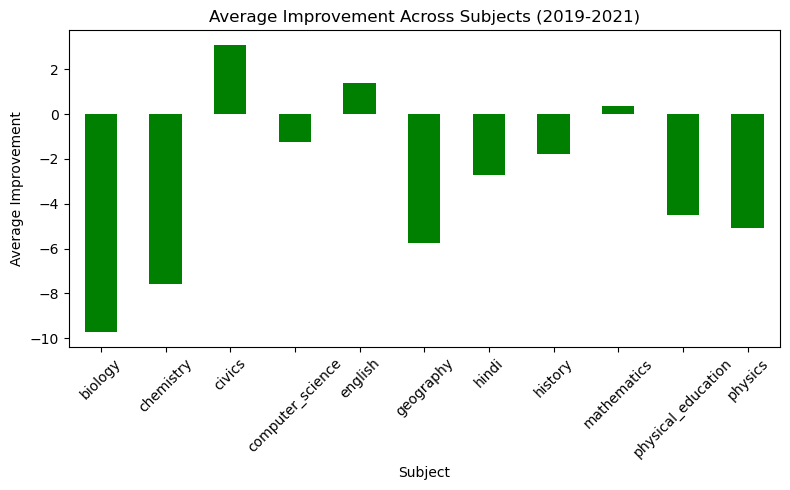

In [37]:
improvement = data.pivot_table(
    index=['school', 'student_name'],
    columns='year',
    values=[
        'hindi', 'english', 'history', 'geography', 'civics',
        'mathematics', 'physics', 'chemistry', 'biology',
        'computer_science', 'physical_education'
    ]
)

improvement_diff = improvement.xs(2021, level='year', axis=1) - improvement.xs(2019, level='year', axis=1)
highest_improvement = improvement_diff.idxmax()

# print the result
highest_improvement

# Plot Highest Improvement
improvement_diff.mean(axis=0).plot(kind='bar', figsize=(8,5), color='green')
plt.title('Average Improvement Across Subjects (2019-2021)')
plt.xlabel('Subject')
plt.ylabel('Average Improvement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4.Best School for Each Stream

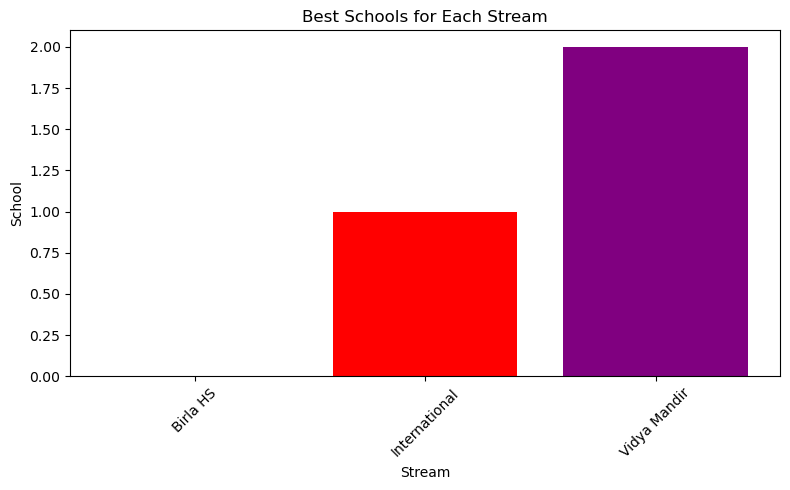

In [36]:
stream_subjects = {
    'Arts': ['hindi', 'english', 'history', 'geography', 'civics'],
    'Science': ['mathematics', 'physics', 'chemistry', 'biology', 'computer_science'],
    'Commerce': ['hindi', 'english', 'mathematics', 'computer_science', 'physical_education']
}

best_schools = {}
for stream, subjects in stream_subjects.items():
    stream_avg = data.groupby('school')[subjects].mean().mean(axis=1)
    best_schools[stream] = stream_avg.idxmax()

# print the result
best_schools

# Plot Best Schools for Each Stream
streams = list(best_schools.keys())
schools = list(best_schools.values())
plt.figure(figsize=(8,5))
plt.bar(streams, range(len(streams)), color=['blue', 'red', 'purple'])
plt.title('Best Schools for Each Stream')
plt.xlabel('Stream')
plt.ylabel('School')
plt.xticks(range(len(streams)), schools, rotation=45)
plt.tight_layout()
plt.show()

# 5.Categorize Students Based on Average Marks

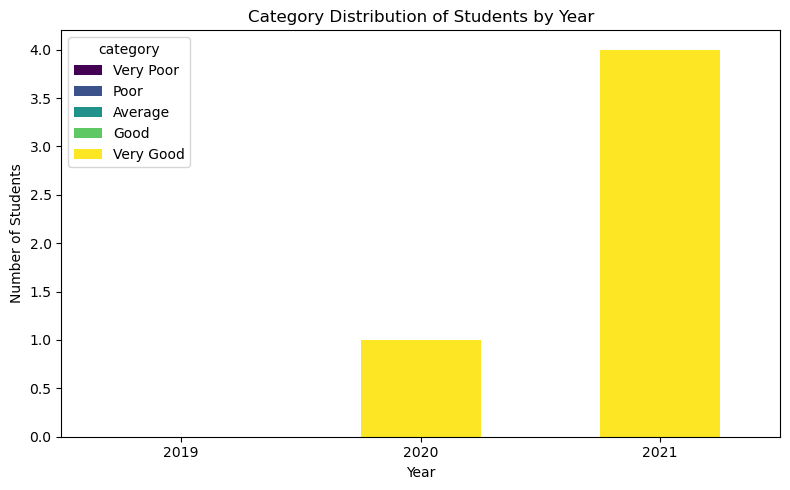

In [35]:
categories = pd.cut(
    data['total_marks'] / len(stream_subjects['Arts']),  
    bins=[-np.inf, 20, 40, 60, 80, 100],
    labels=['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']
)
data['category'] = categories
category_counts = data.groupby(['school', 'year', 'category']).size().unstack(fill_value=0)

# print the result
category_counts

# Plot Category Counts
category_counts.groupby('year').sum().plot(kind='bar', stacked=True, figsize=(8,5), cmap='viridis')
plt.title('Category Distribution of Students by Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 6.Best School by Year (Good & Very Good)

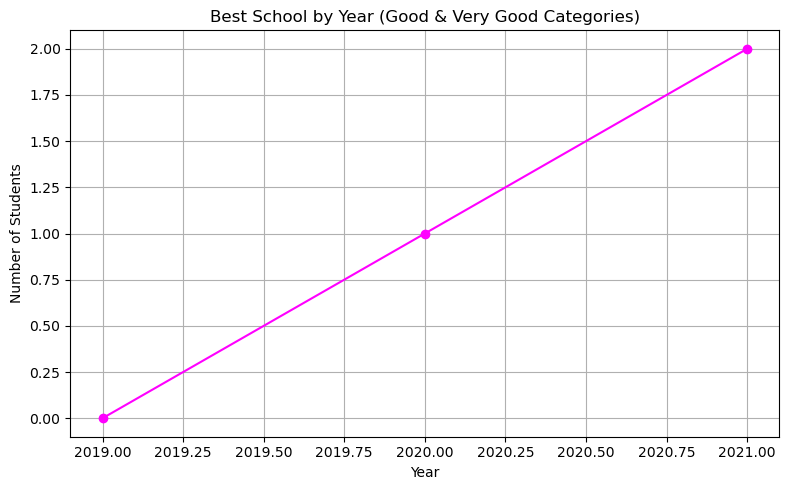

In [34]:
category_counts['Good & Very Good'] = category_counts[['Good', 'Very Good']].sum(axis=1)
best_school_per_year = category_counts.groupby('year')['Good & Very Good'].idxmax()

# print the result
best_school_per_year

# Plot Best School by Year
best_school_data = category_counts.groupby('year')['Good & Very Good'].max()
best_school_data.plot(kind='line', marker='o', figsize=(8,5), color='magenta')
plt.title('Best School by Year (Good & Very Good Categories)')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid()
plt.tight_layout()
plt.show()

# 7.Fastest-Growing School

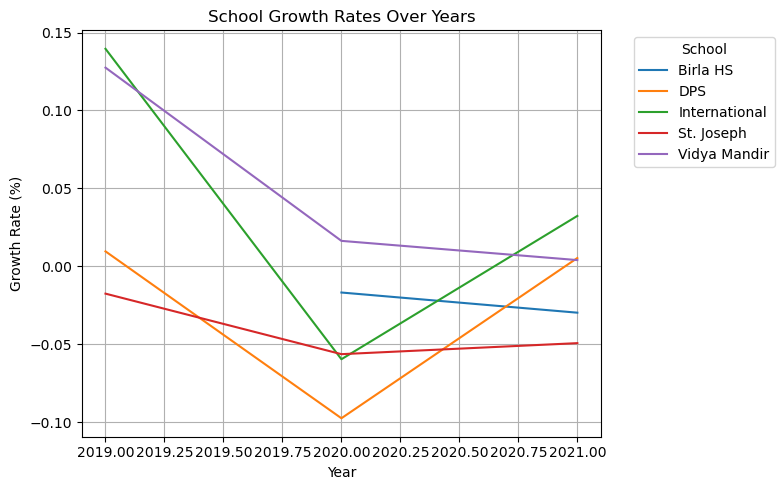

In [33]:
school_growth = data.groupby(['school', 'year'])['total_marks'].sum().pct_change().reset_index()
fastest_growing_school = school_growth.loc[school_growth.groupby('school')['total_marks'].idxmax()]

# print the result
fastest_growing_school

# Plot Growth Rates
school_growth_pivot = school_growth.pivot(index='year', columns='school', values='total_marks')
school_growth_pivot.plot(kind='line', figsize=(8,5))
plt.title('School Growth Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
